In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [82]:
# claw data
def claw_DataStock_Gcafe(Name, Page):
    header= {
            'Cookie': 'favorite_stocks_state=1; __UF=-1; _uidcms=1658202174129752373; __R=2; __tb=0; _gid=GA1.2.1136744825.1661092261; __RC=31; cafef.IsMobile=IsMobile=NO; _ga_D40MBMET7Z=GS1.1.1661141800.2.1.1661141969.0.0.0; _ga_860L8F5EZP=GS1.1.1661141792.3.1.1661141970.0.0.0; _ga=GA1.2.480233724.1658202174; _gat_gtag_UA_34575478_17=1; __uif=__uid%3A1375247731963110594%7C__create%3A1657524773',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36',
            }

    playload = {
            'ctl00$ContentPlaceHolder1$ctl03$txtKeyword': Name,
            '__EVENTTARGET': 'ctl00$ContentPlaceHolder1$ctl03$pager2',
            '__EVENTARGUMENT': Page,
            }

    url = 'https://s.cafef.vn/Lich-su-giao-dich-'+Name+'-1.chn'
    crawl = requests.post(url, headers = header, data = playload)
    return crawl.text

def count_page(Name):
    count_page = 1
    while True:

        check = claw_DataStock_Gcafe(Name, count_page)
        if check.find('style="font-family: Arial; font-size: 10px; font-weight: normal; background-color: #FFF;height:30px;padding-right:5px">') == -1:
            return count_page
            break

        count_page += 1

data = []
name = 'SAM'
for i in range(count_page(name)):
    fill_data = claw_DataStock_Gcafe(name, i)
    fill_data = fill_data.split('<tr')
    for data_index in range(len(fill_data)):
        if fill_data[data_index].find('<td class="Item_DateItem">') != -1:
            date  = fill_data[data_index].split('<td')[1][fill_data[data_index].split('<td')[1].find('>')+1:fill_data[data_index].split('<td')[1].find('<')].replace(',','')
            price = fill_data[data_index].split('<td')[2][fill_data[data_index].split('<td')[2].find('>')+1:fill_data[data_index].split('<td')[2].find('&')].replace(',','')
            vol   = fill_data[data_index].split('<td')[6][fill_data[data_index].split('<td')[6].find('>')+1:fill_data[data_index].split('<td')[6].find('&')].replace(',','')
            if float(price) != 0 and int(vol) != 0:
                data.append((date, float(price), int(vol)))

In [83]:
volPriceStock_df = pd.DataFrame(data, columns =['Date', 'Price', 'Volume'])

volPriceStock_df = volPriceStock_df[::-1].reset_index()
volPriceStock_df = volPriceStock_df.drop(['index'], axis=1)
volPriceStock_df

,Date,Price,Volume
0,28/07/2000,2.12,3200
1,31/07/2000,2.14,10000
2,02/08/2000,2.18,200
3,04/08/2000,2.22,1900
4,07/08/2000,2.26,7300
...,...,...,...
5345,05/09/2022,12.75,776800
5346,06/09/2022,12.90,942100
5347,07/09/2022,12.00,1848000
5348,08/09/2022,11.60,1758700


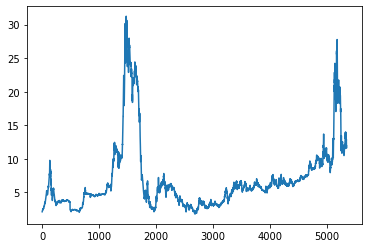

In [84]:
Price = volPriceStock_df['Price'].to_numpy()


plt.plot(Price)

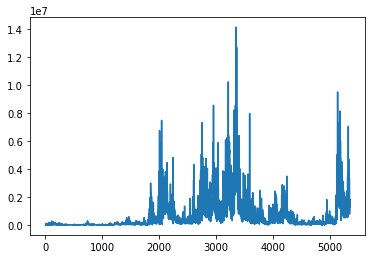

In [85]:
volume = volPriceStock_df['Volume'].to_numpy()

plt.plot(volume)

In [86]:
print('Volume_shape: ', volume.shape)
print('Price_shape: ', Price.shape)

Volume_shape:  (5350,)
Price_shape:  (5350,)


In [87]:
X_price = []
X_Volume = []
Y = []
step = 10
range_pred = 3
for i in range(0, len(Price)-step, step):
    X_price.append(Price[i:i+step-range_pred])
    X_Volume.append(volume[i:i+step-range_pred])
    Y.append(Price[i+step-range_pred:i+step])

In [88]:
X_price, X_Volume, Y = np.array(X_price), np.array(X_Volume), np.array(Y)

print('X_price shape =',X_price.shape)
print('X_Volume shape =',X_Volume.shape)
print('y shape =',Y.shape)

X_price shape = (534, 7)
X_Volume shape = (534, 7)
y shape = (534, 3)


In [89]:
# create df for price
mean_price_df = pd.DataFrame(X_price, columns =['price_1', 'price_2', 'price_3', 'price_4', 'price_5', 'price_6', 'price_7'])
mean_price_df

,price_1,price_2,price_3,price_4,price_5,price_6,price_7
0,2.12,2.14,2.18,2.22,2.26,2.29,2.33
1,2.48,2.52,2.55,2.50,2.45,2.42,2.42
2,2.59,2.64,2.59,2.59,2.59,2.62,2.64
3,2.74,2.79,2.84,2.89,2.94,2.99,2.99
4,3.09,3.14,3.20,3.26,3.33,3.39,3.45
...,...,...,...,...,...,...,...
529,11.00,11.00,11.00,10.90,11.00,10.90,11.65
530,10.90,11.00,11.05,10.60,10.50,10.50,10.80
531,11.05,11.80,11.60,11.70,12.15,11.90,11.70
532,11.95,11.75,12.10,12.90,13.00,12.90,13.25


In [90]:
# create df for vol
mean_vol_df = pd.DataFrame(X_Volume, columns =['vol_1', 'vol_2', 'vol_3', 'vol_4', 'vol_5', 'vol_6', 'vol_7'])
mean_vol_df

,vol_1,vol_2,vol_3,vol_4,vol_5,vol_6,vol_7
0,3200,10000,200,1900,7300,13300,300
1,24400,67200,74200,59900,115200,70100,56600
2,5400,49000,26800,49900,41200,32800,26100
3,13400,34600,13400,16100,10500,43900,18300
4,33300,62300,49300,11000,49700,18800,10000
...,...,...,...,...,...,...,...
529,838400,1517900,1314800,1283000,860400,1766000,2243300
530,1251300,1311400,764200,1035500,1105700,725100,600300
531,549900,3444000,1100800,951500,2953200,1601100,1000400
532,2373300,969600,1153300,7040800,2200700,2107500,3583100


In [91]:
# Calculate the mean of each column
means_price = [mean_price_df[col].mean() for col in mean_price_df]
means_vol   = [mean_vol_df[col].mean() for col in mean_vol_df]
# means
print('means_price = ', means_price)
print('means_vol   = ', means_vol)

means_price =  [6.8976779026217265, 6.886685393258429, 6.891123595505615, 6.904494382022467, 6.921966292134832, 6.916086142322098, 6.936329588014985]
means_vol   =  [622339.5692883895, 639471.8164794007, 615336.5730337079, 616376.2359550562, 704835.468164794, 616675.7116104868, 633493.3895131086]


In [92]:
# Calculate the Std. Deviation of each column
std_price = [mean_price_df[col].std() for col in mean_price_df]
std_vol   = [mean_vol_df[col].std() for col in mean_vol_df]
# means
print('std_price = ', std_price)
print('std_vol   = ', std_vol)

std_price =  [5.14417591235558, 5.099766362073971, 5.117508211267255, 5.146031679999948, 5.202162855759957, 5.182669439019002, 5.212457009778133]
std_vol   =  [960396.1561789898, 1181960.810087785, 956540.9709881957, 986659.2531345985, 1270704.811556861, 1009523.3539056065, 1050848.9548679322]


In [93]:
# Create TensorFlow preprocessing function for stats stream
def stat_scaler_price(tensor):
    return (tensor - means_price) / std_price

def stat_scaler_vol(tensor):
    return (tensor - means_vol) / std_vol

In [94]:
split = int(len(X_price)*95/100)
x_train_price, x_test_price = X_price[:split], X_price[split:]
x_train_vol, x_test_vol = X_Volume[:split], X_Volume[split:]

y_train, y_test = Y[:split], Y[split:]

print('x_train_price shape =',x_train_price.shape)
print('x_test_price shape =',x_test_price.shape)
print('x_train_vol shape =',x_train_vol.shape)
print('x_test_vol shape =',x_test_vol.shape)
print('y_train shape =',y_train.shape)
print('y_test shape =',y_test.shape)

x_train_price shape = (507, 7)
x_test_price shape = (27, 7)
x_train_vol shape = (507, 7)
x_test_vol shape = (27, 7)
y_train shape = (507, 3)
y_test shape = (27, 3)


In [101]:
def build_model():
    # Inputs to the model
    input_Price = layers.Input(shape=(7,))
    x           = layers.Lambda(stat_scaler_price)(input_Price)
    x           = layers.Dense(64, activation="relu")(x)
    x           = layers.Dropout(0.2)(x)
    x           = layers.Dense(128, activation="relu")(x)
    x           = layers.Dropout(0.2)(x)
    x           = layers.Dense(256, activation="relu")(x)
    x           = layers.Dropout(0.2)(x)
    x           = layers.Dense(512, activation="relu")(x)
    x           = layers.Dropout(0.2)(x)
    x           = layers.Dense(512, activation="relu")(x)
    x           = layers.Dropout(0.2)(x)
    x           = layers.Dense(3, activation="linear")(x)
    
    # Define the final model
    model = Model(inputs=input_Price, outputs=x, name="Predict_Stock")
    
    # Compile the model with Adam optimizer and mean-squared-error loss function
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
    
    model.compile(optimizer=optimizer,loss='mse')
    
    return model

In [102]:
model = build_model()
model.summary()

Model: "Predict_Stock"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 7)]               0         
                                                                 
 lambda_10 (Lambda)          (None, 7)                 0         
                                                                 
 dense_48 (Dense)            (None, 64)                512       
                                                                 
 dropout_39 (Dropout)        (None, 64)                0         
                                                                 
 dense_49 (Dense)            (None, 128)               8320      
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_50 (Dense)            (None, 256)             

In [103]:
# Thiết lập hàm call back Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.1, mode="auto", patience=150, restore_best_weights=True)


history = model.fit(x_train_price, y_train, epochs = 5000, batch_size = 100, validation_split=0.25, shuffle=True, callbacks = callback)

Epoch 1/5000
4/4 [==============================] - 1s 104ms/step - loss: 51.9885 - val_loss: 53.7117
Epoch 2/5000
4/4 [==============================] - 0s 35ms/step - loss: 61.5832 - val_loss: 44.8059
Epoch 3/5000
4/4 [==============================] - 0s 31ms/step - loss: 50.0776 - val_loss: 16.8895
Epoch 4/5000
4/4 [==============================] - 0s 43ms/step - loss: 70.5943 - val_loss: 45.0941
Epoch 5/5000
4/4 [==============================] - 0s 46ms/step - loss: 55.9735 - val_loss: 41.1839
Epoch 6/5000
4/4 [==============================] - 0s 39ms/step - loss: 52.4692 - val_loss: 36.9724
Epoch 7/5000
4/4 [==============================] - 0s 36ms/step - loss: 48.4194 - val_loss: 30.6883
Epoch 8/5000
4/4 [==============================] - 0s 44ms/step - loss: 42.0462 - val_loss: 20.6885
Epoch 9/5000
4/4 [==============================] - 0s 46ms/step - loss: 31.3707 - val_loss: 7.3509
Epoch 10/5000
4/4 [==============================] - 0s 42ms/step - loss: 63.5588 - val_los

4/4 [==============================] - 0s 38ms/step - loss: 3.6378 - val_loss: 0.3917
Epoch 83/5000
4/4 [==============================] - 0s 35ms/step - loss: 3.4440 - val_loss: 1.4099
Epoch 84/5000
4/4 [==============================] - 0s 34ms/step - loss: 3.1120 - val_loss: 0.4423
Epoch 85/5000
4/4 [==============================] - 0s 31ms/step - loss: 4.7449 - val_loss: 0.6658
Epoch 86/5000
4/4 [==============================] - 0s 55ms/step - loss: 3.8654 - val_loss: 0.6728
Epoch 87/5000
4/4 [==============================] - 0s 39ms/step - loss: 8.6673 - val_loss: 19.6495
Epoch 88/5000
4/4 [==============================] - 0s 35ms/step - loss: 6.7155 - val_loss: 17.7132
Epoch 89/5000
4/4 [==============================] - 0s 32ms/step - loss: 6.9628 - val_loss: 14.9621
Epoch 90/5000
4/4 [==============================] - 0s 46ms/step - loss: 7.6602 - val_loss: 11.8218
Epoch 91/5000
4/4 [==============================] - 0s 30ms/step - loss: 6.1726 - val_loss: 16.4335
Epoch 92/

4/4 [==============================] - 0s 38ms/step - loss: 3.1506 - val_loss: 0.2405
Epoch 164/5000
4/4 [==============================] - 0s 34ms/step - loss: 2.3695 - val_loss: 0.4079
Epoch 165/5000
4/4 [==============================] - 0s 40ms/step - loss: 2.5826 - val_loss: 0.4293
Epoch 166/5000
4/4 [==============================] - 0s 31ms/step - loss: 2.5939 - val_loss: 0.4076
Epoch 167/5000
4/4 [==============================] - 0s 30ms/step - loss: 2.1426 - val_loss: 0.7327
Epoch 168/5000
4/4 [==============================] - 0s 29ms/step - loss: 1.7965 - val_loss: 0.5370
Epoch 169/5000
4/4 [==============================] - 0s 28ms/step - loss: 3.1984 - val_loss: 0.3746
Epoch 170/5000
4/4 [==============================] - 0s 27ms/step - loss: 2.0447 - val_loss: 0.4658
Epoch 171/5000
4/4 [==============================] - 0s 32ms/step - loss: 1.8500 - val_loss: 0.4276
Epoch 172/5000
4/4 [==============================] - 0s 41ms/step - loss: 1.7975 - val_loss: 0.7172
Epoch

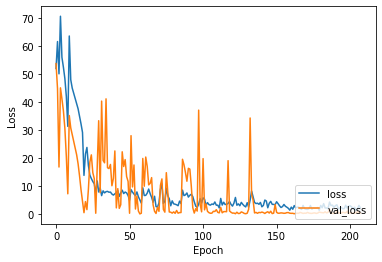

In [104]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [105]:
test_predictions =  model.predict(x_test_price)

for i in range(9):
    print(f'giá dự đoán: {test_predictions[i]}  Giá thực tế {y_test[i]}')
    
count = 0
for i in range(len(test_predictions)):
    check = round(float(test_predictions[i][0]), 2) - float(y_test[i][0])
    if -0.2 < check < 0.2:
        count += 1

print(f'Xác suất dự đoán trúng = {count/len(test_predictions)*100}')

1/1 [==============================] - 0s 86ms/step
giá dự đoán: [9.665903 9.650312 9.662167]  Giá thực tế [9.34 9.44 9.55]
giá dự đoán: [9.643541 9.629485 9.641048]  Giá thực tế [9.29 9.2  9.19]
giá dự đoán: [9.806961 9.792131 9.804733]  Giá thực tế [9.77 9.55 9.58]
giá dự đoán: [10.299673 10.283897 10.297674]  Giá thực tế [12.02 12.84 13.03]
giá dự đoán: [9.7113495 9.697865  9.709913 ]  Giá thực tế [10.82 10.78 11.49]
giá dự đoán: [12.480113 12.459967 12.471872]  Giá thực tế [15.9  15.61 16.28]
giá dự đoán: [19.342663 19.292831 19.328114]  Giá thực tế [22.89 21.31 21.84]
giá dự đoán: [19.342663 19.292831 19.328114]  Giá thực tế [22.85 22.8  23.47]
giá dự đoán: [15.455214 15.42115  15.441103]  Giá thực tế [19.68 19.16 19.49]
Xác suất dự đoán trúng = 3.7037037037037033


In [100]:
# save model
model.save(r'C:\Users\HP\Desktop\newthing AI\PredictStock_DeepLearning\Save_model\PredictStock_SAM.h5')

In [81]:
#ndn rate 40%
from tensorflow.keras.models import load_model
Stock_Symbol = 'NDN'
model = load_model(fr'C:\Users\HP\Desktop\newthing AI\PredictStock_DeepLearning\Save_model\PredictStock_{Stock_Symbol}.h5')

x = Price[-7:]
price_7days = tf.expand_dims(x,0)
price_pred =  model.predict(price_7days)
price_pred

1/1 [==============================] - 0s 134ms/step


array([[10.381558, 10.469174, 10.61329 ]], dtype=float32)